In [4]:
import torch
from torchvision import transforms
from torch.autograd import Variable
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = ""
model_name = 'model' + str(x) + '.pt'
model = torch.load(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_transforms = transforms.Compose([transforms.ToTensor()])
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

/Users/tejvirjogani/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


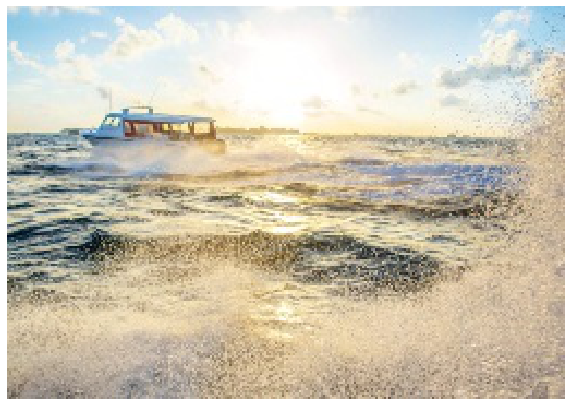

In [11]:
im = np.array(Image.open('./test.jpg'))
to_pil = transforms.ToPILImage()
fig=plt.figure(figsize=(10,10))
image = to_pil(im)
index = predict_image(image)
sub = fig.add_subplot()
plt.axis('off')
plt.imshow(image)
plt.show()